# Machine Learning Operations over MNIST data


In [7]:

#Data structure objects
import pandas as pd
import numpy as np

#Plotting objects
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Data splitting, scaling, transformation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Regressions and classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

#Miscellany
import warnings
import time

warnings.filterwarnings('ignore')

## Given code

In [8]:
# This is the downloaded CSV file. Load it in.
mnist_csv = np.genfromtxt("mnist_data.csv", delimiter=",")

# Split into features and target
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)


## Question 1

### 1.a Preprocess the data.

<p>In this case the appropiate method to preprocess the data is to use Standard Scaler</p>

In [9]:
#SCALING DATA
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1.b Visualize one element from each class.

<p>First, we check what classes do we have and how many elements of each one.</p>

In [10]:
#how many elements of each number do we have in our data
for i in range(0,10):
    print(f'There are {len(np.where(y==i)[0])} elements for the number  {i} ')
    

There are 3456 elements for the number  0 
There are 3863 elements for the number  1 
There are 3470 elements for the number  2 
There are 3597 elements for the number  3 
There are 3431 elements for the number  4 
There are 3215 elements for the number  5 
There are 3443 elements for the number  6 
There are 3701 elements for the number  7 
There are 3395 elements for the number  8 
There are 3429 elements for the number  9 


<p>Visualize one random element from each class.</p>

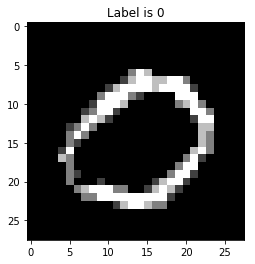

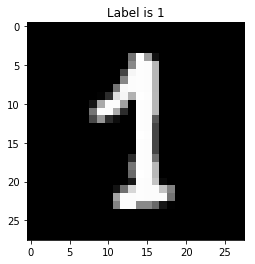

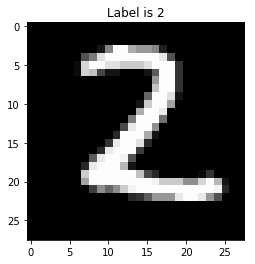

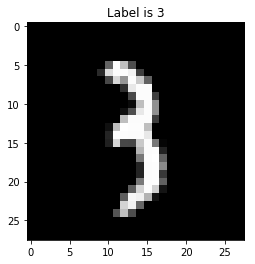

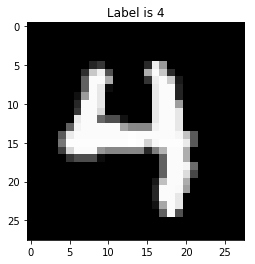

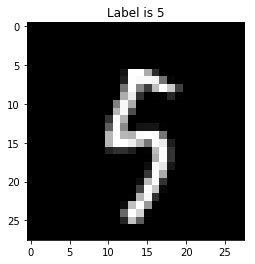

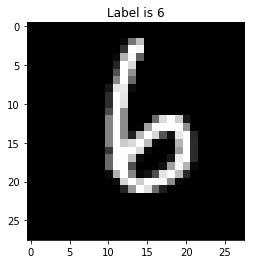

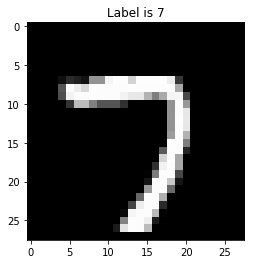

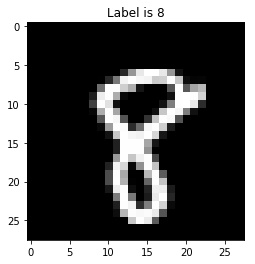

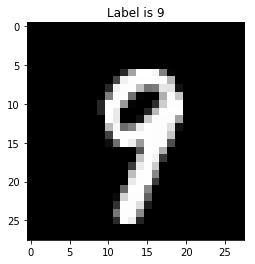

In [11]:

for selected_number in range(0,10):
    #getting the appropiate subindex
    X_subindex = np.where(y==selected_number)[0][np.random.randint(len(np.where(y==selected_number)[0]))]
    
    #getting the pixels
    pixels = np.array(X[X_subindex], dtype='uint8')
    
    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    #Plot
    plt.title(f'Label is {selected_number}')
    plt.imshow(pixels, cmap='gray')
    plt.show()



## 1.c Visualize the mean of each class.


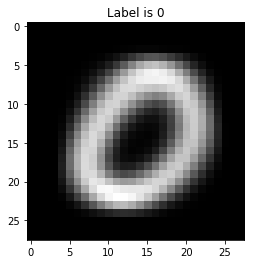

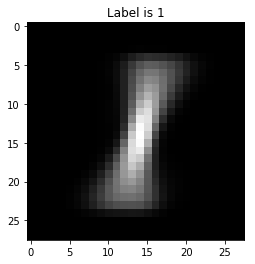

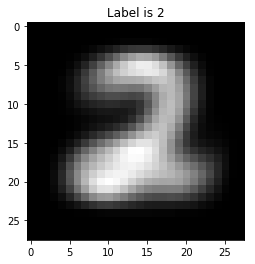

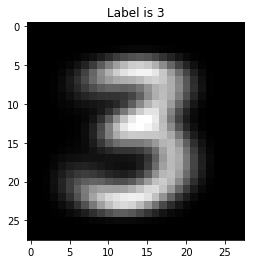

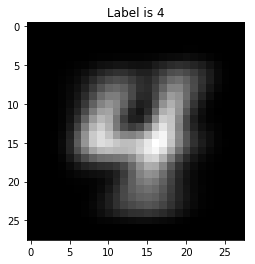

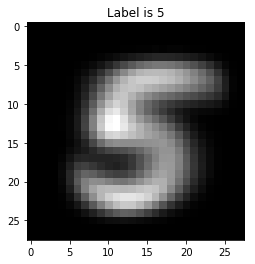

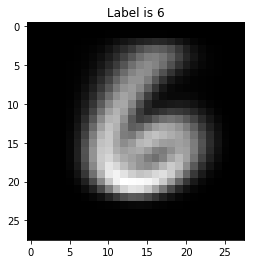

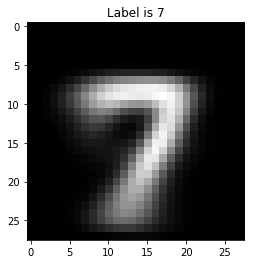

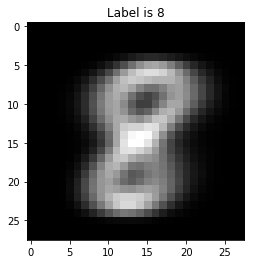

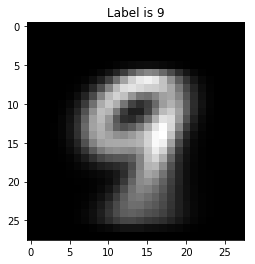

In [12]:
#to find the mean of each number we should first get all the positions in Y and then the mean for each column in X

#getting the positions for each number
for i in range(0,10):
    selected_number = i
    X_arr_selected_number =[]
    pos_selected_number = np.where(y==selected_number)[0]

    #getting all the observations for each number
    for pos_observation in (pos_selected_number):
        X_arr_selected_number.append(X[pos_observation])

    #getting the mean
    X_mean = np.mean(X_arr_selected_number, axis = 0)

    #getting the pixels
    pixels = np.array(X_mean, dtype='uint8')

    # Reshape the array into 28 x 28 array 
    pixels = pixels.reshape((28, 28))

    #Plot
    plt.title(f'Label is {selected_number}')
    plt.imshow(pixels, cmap='gray')
    plt.show()        
        
        

## Question 2

### (Intro) Fit Logistic Regression

<p>Fit a logistic regression model to this data with its solver set to be the 'lbfgs' algorithm. (You can try using other solvers if you’d like, but this is one of the fastest ones.)</p>

<p>We can see that the execution of the logistic regression if we do not apply dimensionality reduction takes more than 13 seconds and its level of accuracy is 94 %.</p>

In [15]:
#We already charged and Scaled the data

#PERFORMING LOGISTIC REGRESSION
start = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(X_train, y_train);

prediction = logisticRegr.predict(X_train);

end = time.time()

print(f'Accuracy score without dimensionality reduction: {accuracy_score(prediction, y_train)}')
print(f'Processing time without dimensionality reduction: {end - start}')


Accuracy score without dimensionality reduction: 0.9481428571428572
Processing time without dimensionality reduction: 13.679149866104126


### 2.a Reduce the dimensionality of your data using Principal Component Analysis.


<p>Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.</p>


In [16]:

# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

#PERFORMING LOGISTIC REGRESSION
start = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(X_train, y_train);

prediction = logisticRegr.predict(X_train);

end = time.time()

print(f'Accuracy score with dimensionality reduction: {accuracy_score(prediction, y_train)}')
print(f'Processing time with dimensionality reduction: {end - start}')


Accuracy score with dimensionality reduction: 0.9316190476190476
Processing time with dimensionality reduction: 6.6789000034332275


### 2.b What does reducing the dimensionality do to the computation time and why? What does reducing the number of data points do to the computation time and why?
<p>When we apply PCA with a variance of 95%, we achieve a reduction of half the execution time, and we only lose near to one percent of the accuracy.</p>
<p>The explanation for the reduction of the processing time is that when we reduce dimensionality, the execution of the necessary calculations is faster. In this case we see that from 784 original dimensions we have 303 left, that is to say, that the number of dimensions to be processed is 61% less.</p>
<p>In the same way, if we reduce the data points, we could reduce processing time since they are fewer data to calculate.</p>

In [20]:
print(f'Original dimensions: {X.shape[1]}')

Original dimensions: 784


In [21]:
print(f'Dimensions after PCA: {pca.n_components_}')

Dimensions after PCA: 303


### 2.c List one advantage and disadvantage of reducing dimensionality. List one advantage and disadvantage of reducing the number of data points.
<p><b><u>Reducing Dimensionality</u></b></p>
<ul>
    <li>Advantage: Reduce time of processing with lower and controlled consequences on accuracy</li>
    <li>Disadvantage: The downside of this is the reduction of the accuracy, as mentioned before. As we lose features, data would be difficult to interpret.</li>    
</ul>

<p><b><u>Reducing Data Points</u></b></p>
<ul>
    <li>Advantage: Reduce time of processing without losing features</li>
    <li>Disadvantage: The lost of accuracy is more important and less controlled than with PCA.</li>    
</ul>


## Question 3

### 3.c Build another model to predict which digit is written, this time using a decision tree. Instead of controlling for the K-value, control for the depth of the tree. Document your model-fitting and model-evaluation process clearly.

<p>First, I will try different depths to understand which is the best according to the accuracy obtained.</p>

In [22]:
def DecisionTreeWithDepth(p_max_depth):
    #Fit to the training data
    DT_model = DecisionTreeClassifier(max_depth=p_max_depth)
    DT_model.fit(X_train, y_train)
    
    print("")
    print(f"The TRAIN classification accuracy for {p_max_depth} max depth is:  {DT_model.score(X_train,y_train)}")
    print(f"The TEST classification accuracy  for {p_max_depth} max depth is:  {DT_model.score(X_test,y_test)}")
    print("")


The best fit for the tree max_depth is 14, with an accuracy of 0.7965

In [23]:
#Trying different max depths to choose the best accuracy level:
for i in (range(1,20)):
     DecisionTreeWithDepth(i)



The TRAIN classification accuracy for 1 max depth is:  0.19223809523809524
The TEST classification accuracy  for 1 max depth is:  0.19264285714285714


The TRAIN classification accuracy for 2 max depth is:  0.29423809523809524
The TEST classification accuracy  for 2 max depth is:  0.29364285714285715


The TRAIN classification accuracy for 3 max depth is:  0.3884761904761905
The TEST classification accuracy  for 3 max depth is:  0.38442857142857145


The TRAIN classification accuracy for 4 max depth is:  0.47785714285714287
The TEST classification accuracy  for 4 max depth is:  0.4677142857142857


The TRAIN classification accuracy for 5 max depth is:  0.5536190476190476
The TEST classification accuracy  for 5 max depth is:  0.5408571428571428


The TRAIN classification accuracy for 6 max depth is:  0.6245714285714286
The TEST classification accuracy  for 6 max depth is:  0.6016428571428571


The TRAIN classification accuracy for 7 max depth is:  0.7093333333333334
The TEST classifica

<p>Now we can try to get more accuracy adjusting the parameter min_samples_leaf </p>

In [25]:
def DecisionTreeWithDepthAndLeafs(p_max_depth, p_min_samples_leaf):
    #Fit to the training data
    DT_model = DecisionTreeClassifier(max_depth=p_max_depth, min_samples_leaf=p_min_samples_leaf)
    DT_model.fit(X_train, y_train)
    
    print(f"For  {p_max_depth} as Max Depth and {p_min_samples_leaf} as Min Samples of Leafs")
    print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train,y_train)}")
    print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")
    print("")


The best fit of min_samples_leaf for the tree with a max_depth of 14 is min_samples_leaf=6 with an accuracy of 0.7994285714285714

In [29]:
#now that we know the best value for the Depth is 10,
#we can use try to improve the accuracy adjusting the number of leafs
for i in (range(1,8)):
     DecisionTreeWithDepthAndLeafs(14,i)


For  14 as Max Depth and 1 as Min Samples of Leafs
The TRAIN classification accuracy is:  0.9536666666666667
The TEST classification accuracy is:  0.7957857142857143

For  14 as Max Depth and 2 as Min Samples of Leafs
The TRAIN classification accuracy is:  0.9382380952380952
The TEST classification accuracy is:  0.7942857142857143

For  14 as Max Depth and 3 as Min Samples of Leafs
The TRAIN classification accuracy is:  0.9273809523809524
The TEST classification accuracy is:  0.7949285714285714

For  14 as Max Depth and 4 as Min Samples of Leafs
The TRAIN classification accuracy is:  0.918
The TEST classification accuracy is:  0.7976428571428571

For  14 as Max Depth and 5 as Min Samples of Leafs
The TRAIN classification accuracy is:  0.9084285714285715
The TEST classification accuracy is:  0.799

For  14 as Max Depth and 6 as Min Samples of Leafs
The TRAIN classification accuracy is:  0.9029047619047619
The TEST classification accuracy is:  0.7994285714285714

For  14 as Max Depth and

## 3.a and 3.b KNN 

In [22]:

# Split into training & test sets FROM former train data to knn train and test data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train, y_train, test_size=0.50, stratify = y_train)

print(f"The number of data points is: {len(mnist_csv)}")
print(f"The number of data points in train for KNN is: {len(X_train_knn)}")
print(f"The number of data points in test for KNN is: {len(X_test_knn)}")


The number of data points is: 35000
The number of data points in train for KNN is: 875
The number of data points in test for KNN is: 875


In [18]:
#def CalculateKNN(p_n_neighbors):
#    KNN_model = KNeighborsClassifier(n_neighbors=p_n_neighbors)
#    KNN_model.fit(X_train_knn,X_test_knn);
#    random_test_index=np.random.randint(0,len(y_test_knn)-1)
#    class_test = y_test_knn[random_test_index]
#    independet_test = X_test_knn[random_test_index]
#    prediction = KNN_model.predict(independet_test)
#    print(f"The predicted class for {class_test} is: {prediction}")

In [23]:
#Transform data
scaler = StandardScaler()
scaler.fit(X_train_knn)
X_train_knn = scaler.transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

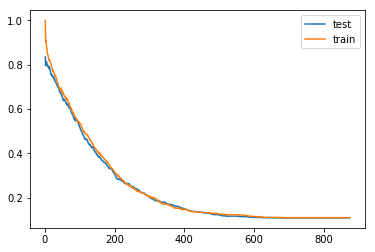

In [24]:
test_scores = []
train_scores = []
K = []

for i in range(1, X_test_knn.shape[0]):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train_knn, y_train_knn)
    test_scores.append(KNN_model.score(X_test_knn, y_test_knn))
    train_scores.append(KNN_model.score(X_train_knn, y_train_knn))
    K.append(i)
    
plt.plot(K, test_scores, label="test")
plt.plot(K, train_scores, label="train")
plt.legend()
plt.show()


## Question 4

### 4.a Fit a logistic regression model and use 5-fold cross-validation to optimize its hyperparameters. For each hyperparameter that you’re tuning, describe what it controls in your model. What are the optimal hyperparameters that you found?

In [45]:
# This is the downloaded CSV file. Load it in.
mnist_csv = np.genfromtxt("mnist_data.csv", delimiter=",")

# Split into features and target
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Make an instance of PCA 
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

<p>
    I set 2 hyperparameters:
</p>
<ul>
    <li>penalty : Used to specify the norm used in the penalization. In this case I used l2 penalties because l1 was not good.
    </li>
    <li>
        C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    </li>
</ul>

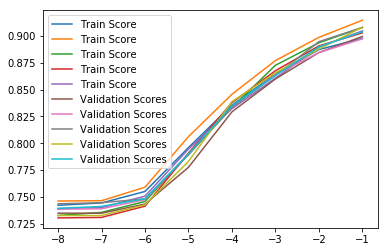

In [30]:
test_scores = []
train_scores = []

C=[.00000001,.0000001,.000001,.00001,.0001,.001,.01,.1]

for c in np.array(C) :
    my_regression = LogisticRegression(penalty='l2',C = c)
    my_regression.fit(X_train,y_train);
    
    train_scores.append(cross_val_score(my_regression,X_train,y_train,cv = 5))
    test_scores.append(cross_val_score(my_regression,X_test,y_test,cv = 5))    

plt.plot(np.log10(C), train_scores,label="Train Score")
plt.plot(np.log10(C), test_scores,label="Validation Scores")

plt.legend();
plt.show();


<p>As we can see the best score is obteined with higher C values, in this case with C=0.1 we have an accuracy of 0.9027119947118626</p>

In [63]:
for i in range(len(C)):
    print(f'For C={C[i]} the train score is {np.mean(train_scores[i])} and the test score is {np.mean(test_scores[i])}')

For C=1e-08 the train score is 0.7372851696291403 and the test score is 0.7364962568533551
For C=1e-07 the train score is 0.7386660318469768 and the test score is 0.7367105938250534
For C=1e-06 the train score is 0.7494288388110154 and the test score is 0.7449968302470251
For C=1e-05 the train score is 0.7956172792143926 and the test score is 0.7860674302334407
For C=0.0001 the train score is 0.836903234124067 and the test score is 0.8324970435301905
For C=0.001 the train score is 0.8682371666769587 and the test score is 0.8623541267132653
For C=0.01 the train score is 0.8928078605072164 and the test score is 0.8903552402184427
For C=0.1 the train score is 0.9059985260311679 and the test score is 0.9027119947118626


### 4.b What does the confusion matrix look like for your best model? Interpret the confusion matrix. Where is your model strongest and weakest?

In [65]:
#the last logistic regression is the best score so we will use it to get the confusion matrix and plot it

#Execute the regression and get the predictions
c=.1

my_regression = LogisticRegression(penalty='l2',C = c)
my_regression.fit(X_train,y_train);



In [68]:
#predictions = my_regression.predict(X_test)
score = my_regression.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)


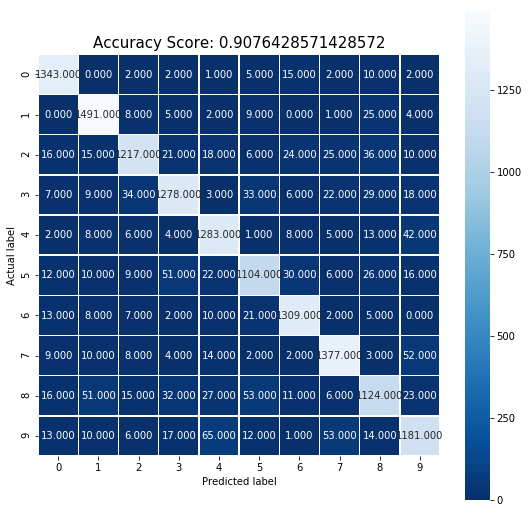

In [69]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### 4.c Re-fit a linear model that can discriminate between the digit 4 and the digit 9. Visualize the weights of the model as an image. What can you learn from this image about how your classifier distinguishes 4s from 9s? (INCOMPLETE)

In [75]:
# This is the downloaded CSV file. Load it in.
mnist_csv = np.genfromtxt("mnist_data.csv", delimiter=",")

# Split into features and target
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]


In [76]:
#to find the mean of each number we should first get all the positions in Y and then the mean for each column in X
X_arr_selected_numbers =[]
y_arr_selected_numbers = []
selected_numbers = [4,9]
for i in range(len(selected_numbers)):
    selected_number = selected_numbers[i]
    pos_selected_number = np.where(y==selected_number)[0]
    #getting all the observations for each number
    for pos_observation in (pos_selected_number):
        y_arr_selected_numbers.append(selected_number)
        X_arr_selected_numbers.append(X[pos_observation])

# new x and y
X = X_arr_selected_numbers
y = y_arr_selected_numbers

In [77]:
# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

#Scale and Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [78]:
test_scores = []
train_scores = []

C = [.00000001,.0000001,.000001,.00001,.0001,.001,\
     1]


for c in np.array(C) :
    my_regression = LogisticRegression(penalty='l2',C = c)
    my_regression.fit(X_train,y_train);
    
    train_scores.append(cross_val_score(my_regression,X_train,y_train,cv = 5));
    test_scores.append(cross_val_score(my_regression,X_test,y_test,cv = 5));    

In [79]:
for i in range(len(C)):
    print(f'For C={C[i]} the train score is {np.mean(train_scores[i])} and the test score is {np.mean(test_scores[i])}')
    
    

For C=1e-08 the train score is 0.8653938086040555 and the test score is 0.8611506303915064
For C=1e-07 the train score is 0.8656365270506574 and the test score is 0.8615142667551428
For C=1e-06 the train score is 0.8670940174068017 and the test score is 0.8633364299933642
For C=1e-05 the train score is 0.8911491151607981 and the test score is 0.8804671532846715
For C=0.0001 the train score is 0.9365876274778984 and the test score is 0.930757796947578
For C=0.001 the train score is 0.9567548019938773 and the test score is 0.9551665560716657
For C=1 the train score is 0.965501226619622 and the test score is 0.9548135368281354


In [80]:
#Execute the regression and get the predictions
c=1

my_regression = LogisticRegression(penalty='l2',C = c)
my_regression.fit(X_train,y_train);



In [82]:
print(f'For C={c} the train score is {np.mean(train_scores[i])} and the test score is {np.mean(test_scores[i])}')

For C=1 the train score is 0.965501226619622 and the test score is 0.9548135368281354
